# Explore multimapper % in TRA/TRB/TRG/TRD productive vs nonproductive

In [1]:
import numpy as np
import scipy as sp
import scanpy as sc
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import rc
from matplotlib import colors
import matplotlib.patches as mpatches
import seaborn as sb
from itertools import compress
import random
import scirpy as ir
import os
import rpy2
%load_ext rpy2.ipython

sc.settings.set_figure_params(dpi = 160, color_map = 'RdYlBu_r', dpi_save = 300, format = 'pdf')
plt.rcParams["figure.figsize"] = [6,6]

In [2]:
sb.set_palette('colorblind')

In [3]:
# import utils
import sys
sys.path.append('/home/jovyan/chenqu_utils')
from array_operations import *

In [4]:
# set working directory
%cd /lustre/scratch117/cellgen/team205/cs42/VDJ_collab_manuscript/

/lustre/scratch117/cellgen/team205/cs42/VDJ_collab_manuscript


In [5]:
# figure directory
fig_path = '/home/jovyan/mount/gdrive/VDJ_collab/plots_output/chenqu_jhub/'
sc.settings.figdir = fig_path

# Load data

In [6]:
# combined contigs csv from panfetal_nonproductive.ipynb
vdj_combine = pd.read_csv('csv/panfetal_vdj_combine_11012023.csv',index_col=0)

/home/jovyan/my-conda-envs/skeleton/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (53,110,111,112,113,114,119) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
# filter for contigs in a cell only
vdj_cell = vdj_combine[~vdj_combine['celltype'].isna()]

In [8]:
# remove contigs with j_call_multimappers being NaN - i.e. no j_call from blastn as our cutoff is more stringent than igblastn
vdj_cell = vdj_cell.loc[~vdj_cell['j_call_multiplicity'].isna(),:]

In [9]:
# add column of j multimappers are present or not
vdj_cell['j_multi_present'] = vdj_cell['j_call_multiplicity'] > 1

In [10]:
# remove no j_call contigs
#vdj_cell = vdj_cell.loc[~vdj_cell['j_call'].isna(),:]

In [11]:
# take out the leftmost j gene in j_call_multimappers
vdj_cell['j_call_leftmost'] = [gene.split(';')[0] for gene in vdj_cell['j_call_multimappers']]

# output top 10 j multimappers for each locus

In [12]:
top_tbl = pd.DataFrame(index = ['TRA','TRB','TRG','TRD','IGH','IGL','IGK'], columns =range(20))

In [13]:
for locus in top_tbl.index:
    select = vdj_cell.loc[np.array(vdj_cell['locus']==locus) & np.array(vdj_cell['j_call_multiplicity']>1),:]
    counter = Counter(select['j_call_multimappers'])
    counter_df = pd.DataFrame.from_dict(counter, orient='index').sort_values(by=0, ascending=False)
    for i in range(min(10, counter_df.shape[0])):
        top_tbl.loc[locus, i*2] = counter_df.index[i]
        top_tbl.loc[locus, i*2+1] = counter_df.iloc[i,0]

In [14]:
top_tbl

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
TRA,TRAJ12*01;TRAJ10*01,100,TRAJ28*01;TRAJ27*01,82,TRAJ29*01;TRAJ27*01,19,TRAJ53*01;TRAJ49*01,17,TRAJ50*01;TRAJ49*01,16,TRAJ32*02;TRAJ27*01,10,TRAJ30*01;TRAJ27*01,10,TRAJ49*01;TRAJ10*01,7,TRAJ58*01;TRAJ49*01,7,TRAJ11*01;TRAJ10*01,6
TRB,TRBJ2-3*01;TRBJ2-4*01,2698,TRBJ2-2P*01;TRBJ2-3*01,2498,TRBJ1-3*01;TRBJ1-4*01,1361,TRBJ2-2P*01;TRBJ2-3*01;TRBJ2-4*01,1161,TRBJ2-5*01;TRBJ2-6*01;TRBJ2-7*01,1130,TRBJ1-1*01;TRBJ1-4*01,981,TRBJ1-2*01;TRBJ1-4*01,870,TRBJ2-5*01;TRBJ2-6*01,755,TRBJ2-6*01;TRBJ2-7*01,472,TRBJ2-3*01;TRBJ2-4*01;TRBJ2-5*01;TRBJ2-6*01,186
TRG,TRGJP1*01;TRGJ2*01,211,TRGJP1*01;TRGJ1*01,119,TRGJP2*01;TRGJ2*01,50,TRGJP*01;TRGJ2*01,28,TRGJP*01;TRGJ1*01,23,TRGJP2*01;TRGJ1*01,2,TRBJ1-2*01;TRBJ1-1*01;TRGJP1*01,1,TRGJP1*01;TRGJP1*01,1,TRBJ2-5*01;TRGJP1*01,1,NaN,NaN
TRD,TRAJ11*01;TRAJ11*01,2,TRAJ10*01;TRAJ10*01,1,TRDJ1*01;TRDJ4*01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IGH,IGHJ1*01;IGHJ3*02,1274,IGHJ5*02;IGHJ6*02,35,IGHJ2*01;IGHJ1*01;IGHJ3*02,27,IGHJ5*02;IGHJ5*02,24,IGHJ1*01;IGHJ2*01,23,IGHJ2*01;IGHJ1*01,23,IGHJ3*02;IGHJ4*02,15,IGHJ4*02;IGHJ5*02,11,IGHJ1*01;IGHJ2*01;IGHJ1*01;IGHJ3*02,10,IGHJ1*01;IGHJ2*01;IGHJ1*01,10
IGL,IGKJ1*01;IGLJ3*01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IGK,IGKJ4*01;IGKJ5*01,12,IGKJ3*01;IGKJ4*01,4,IGKJ1*01;IGKJ2*01,3,IGKJ4*02;IGKJ5*01,3,IGKJ5*01;IGKJ2*02,1,IGKJ3*01;IGKJ2*04;IGKJ4*01,1,IGKJ2*04;IGKJ3*01;IGKJ4*01,1,IGKJ3*01;IGKJ4*01;IGKJ5*01,1,IGKJ2*02;IGKJ1*01;IGKJ4*01;IGKJ5*01,1,IGKJ1*01;IGKJ2*01;IGKJ3*01,1


In [15]:
top_tbl.to_csv('csv/top_10_j_multimappers.csv')
top_tbl.to_csv('/home/jovyan/mount/gdrive/VDJ_collab/manuscript/supplement/top_10_j_multimappers.csv')

In [16]:
df_trb = pd.DataFrame({'sequence': vdj_cell.loc[vdj_cell['j_call_multimappers']=='TRBJ2-3*01;TRBJ2-4*01','sequence'],
                      'c_call': vdj_cell.loc[vdj_cell['j_call_multimappers']=='TRBJ2-3*01;TRBJ2-4*01','c_call']})
df_trb['match'] = False 

In [17]:
# sequence from TRBJ2-3 to TRBJ2-4 including untranslated region 
sequence = 'CACAGATACGCAGTATTTTGGCCCAGGCACCCGGCTGACAGTGCTCGGTAAGCGGGGGCTCCCGCTGAAGCCCCGGAACTGGGGAGGGGGCGCCCCGGGACGCCGGGGGCGTCGCAGGGCCAGTTTCTGTGCCGCGTCTCGGGGCTGTGAGCCAAAAACATTCAGTACTTCGGCGCCGGGACCCGGCTCTCAGTGCTGG'
# sequence from TRBJ2-3 to TRBJ2-4 including untranslated region with 1 SNP in the middle
sequence2 = 'CACAGATACGCAGTATTTTGGCCCAGGCACCCGGCTGACAGTGCTCGGTAAGCGGGGGCTCCCGCTGAAGCCCGGGAACTGGGGAGGGGGCGCCCCGGGACGCCGGGGGCGTCGCAGGGCCAGTTTCTGTGCCGCGTCTCGGGGCTGTGAGCCAAAAACATTCAGTACTTCGGCGCCGGGACCCGGCTCTCAGTGCTGG'

In [18]:
for contig in df_trb.index:
    df_trb.loc[contig, 'match'] = sequence2 in df_trb.loc[contig, 'sequence'] or sequence in df_trb.loc[contig, 'sequence'] 

In [19]:
sum(df_trb['match']) / df_trb.shape[0]

0.7491663579103371

In [20]:
vdj_cell.loc[vdj_cell['j_call_multimappers']=='TRBJ2-3*01;TRBJ2-4*01','sequence'].to_csv('csv/TRB_top_multimapper_sequence.csv')
# Investigated a few contigs - majority cover from TRBJ2-3 to TRBJ2-4

In [21]:
vdj_cell.loc[vdj_cell['j_call_multimappers']=='IGHJ1*01;IGHJ3*02','sequence'].to_csv('csv/IGH_top_multimapper_sequence.csv')
# Investigated a few contigs against - looks like IGHJ2P; IGHJ3 instead of IGHJ1

### repeeat the analysis subsetted to contigs with V gene

In [22]:
vdj_cell_v = vdj_cell.loc[~vdj_cell['v_call'].isna(),:]

In [23]:
top_tbl = pd.DataFrame(index = ['TRA','TRB','TRG','TRD','IGH','IGL','IGK'], columns =range(20))

In [24]:
for locus in top_tbl.index:
    select = vdj_cell_v.loc[np.array(vdj_cell_v['locus']==locus) & np.array(vdj_cell_v['j_call_multiplicity']>1),:]
    counter = Counter(select['j_call_multimappers'])
    counter_df = pd.DataFrame.from_dict(counter, orient='index').sort_values(by=0, ascending=False)
    for i in range(min(10, counter_df.shape[0])):
        top_tbl.loc[locus, i*2] = counter_df.index[i]
        top_tbl.loc[locus, i*2+1] = counter_df.iloc[i,0]

In [25]:
top_tbl

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
TRA,TRAJ28*01;TRAJ27*01,70,TRAJ29*01;TRAJ27*01,18,TRAJ30*01;TRAJ27*01,10,TRAJ53*01;TRAJ49*01,8,TRAJ58*01;TRAJ49*01,6,TRAJ54*01;TRAJ49*01,5,TRAJ11*01;TRAJ10*01,4,TRAJ31*01;TRAJ27*01,4,TRAJ12*01;TRAJ10*01,4,TRAJ49*01;TRAJ10*01,4
TRB,TRBJ2-3*01;TRBJ2-4*01,232,TRBJ1-2*01;TRBJ1-4*01,181,TRBJ1-1*01;TRBJ1-4*01,133,TRBJ1-3*01;TRBJ1-4*01,94,TRBJ2-5*01;TRBJ2-6*01,68,TRBJ2-5*01;TRBJ2-6*01;TRBJ2-7*01,27,TRBJ2-6*01;TRBJ2-7*01,23,TRBJ2-4*01;TRBJ2-5*01,14,TRBJ1-2*01;TRBJ1-3*01,10,TRBJ1-1*01;TRBJ1-3*01,7
TRG,TRGJP1*01;TRGJ2*01,27,TRGJP*01;TRGJ2*01,12,TRGJP1*01;TRGJ1*01,12,TRGJP2*01;TRGJ2*01,10,TRGJP*01;TRGJ1*01,9,TRGJP2*01;TRGJ1*01,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TRD,TRAJ11*01;TRAJ11*01,2,TRAJ10*01;TRAJ10*01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IGH,IGHJ3*02;IGHJ4*02,6,IGHJ4*02;IGHJ5*02,2,IGHJ2*01;IGHJ1*01,1,IGHJ4*02;IGHJ6*02,1,IGHJ3*02;IGKJ3*01,1,IGHJ4*02;IGHJ2*01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IGL,IGKJ1*01;IGLJ3*01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IGK,IGKJ4*01;IGKJ5*01,8,IGKJ3*01;IGKJ4*01,1,IGKJ5*01;IGKJ2*02,1,IGKJ1*01;IGKJ5*01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df_trb = pd.DataFrame({'sequence': vdj_cell_v.loc[vdj_cell_v['j_call_multimappers']=='TRBJ2-3*01;TRBJ2-4*01','sequence'],
                      'c_call': vdj_cell_v.loc[vdj_cell_v['j_call_multimappers']=='TRBJ2-3*01;TRBJ2-4*01','c_call']})
df_trb['match'] = False 

In [27]:
# sequence from TRBJ2-3 to TRBJ2-4 including untranslated region 
sequence = 'CACAGATACGCAGTATTTTGGCCCAGGCACCCGGCTGACAGTGCTCGGTAAGCGGGGGCTCCCGCTGAAGCCCCGGAACTGGGGAGGGGGCGCCCCGGGACGCCGGGGGCGTCGCAGGGCCAGTTTCTGTGCCGCGTCTCGGGGCTGTGAGCCAAAAACATTCAGTACTTCGGCGCCGGGACCCGGCTCTCAGTGCTGG'
# sequence from TRBJ2-3 to TRBJ2-4 including untranslated region with 1 SNP in the middle
sequence2 = 'CACAGATACGCAGTATTTTGGCCCAGGCACCCGGCTGACAGTGCTCGGTAAGCGGGGGCTCCCGCTGAAGCCCGGGAACTGGGGAGGGGGCGCCCCGGGACGCCGGGGGCGTCGCAGGGCCAGTTTCTGTGCCGCGTCTCGGGGCTGTGAGCCAAAAACATTCAGTACTTCGGCGCCGGGACCCGGCTCTCAGTGCTGG'

In [28]:
for contig in df_trb.index:
    df_trb.loc[contig, 'match'] = sequence2 in df_trb.loc[contig, 'sequence'] or sequence in df_trb.loc[contig, 'sequence'] 

In [29]:
sum(df_trb['match']) / df_trb.shape[0]

0.5407725321888412

# Check % of multimappers

In [30]:
# 4 columns that we care about in plotting
group_by=['sample','locus','v_gene_present','j_multi_present']

# make dataframe df
df = vdj_cell[group_by].drop_duplicates()
df = df[group_by].astype("str")
df.index = df[group_by].agg("-".join, axis=1)

# add column 'count' in df
vdj_cell[group_by] = vdj_cell[group_by].astype("str")
vdj_cell["sample-locus-v-j"] = vdj_cell[group_by].agg("-".join, axis=1)
count = vdj_cell.groupby('sample-locus-v-j').count().iloc[:,0]
df['count'] = 0
df['count'].update(count)

# add column with sample-locus-v
df['sample-locus-v'] = df[group_by[:-1]].agg("-".join, axis=1)

df

,sample,locus,v_gene_present,j_multi_present,count,sample-locus-v
FCAImmP7292031-TRB-False-True,FCAImmP7292031,TRB,False,True,298,FCAImmP7292031-TRB-False
FCAImmP7292031-TRB-False-False,FCAImmP7292031,TRB,False,False,193,FCAImmP7292031-TRB-False
FCAImmP7292031-TRB-True-False,FCAImmP7292031,TRB,True,False,236,FCAImmP7292031-TRB-True
FCAImmP7292031-TRA-False-False,FCAImmP7292031,TRA,False,False,61,FCAImmP7292031-TRA-False
FCAImmP7292031-TRA-True-False,FCAImmP7292031,TRA,True,False,154,FCAImmP7292031-TRA-True
...,...,...,...,...,...,...
Human_colon_16S8159190-IGK-True-False,Human_colon_16S8159190,IGK,True,False,12,Human_colon_16S8159190-IGK-True
Human_colon_16S8159190-IGL-False-False,Human_colon_16S8159190,IGL,False,False,6,Human_colon_16S8159190-IGL-False
Human_colon_16S8159190-IGH-False-True,Human_colon_16S8159190,IGH,False,True,3,Human_colon_16S8159190-IGH-False
Human_colon_16S8159190-IGK-False-False,Human_colon_16S8159190,IGK,False,False,2,Human_colon_16S8159190-IGK-False


In [31]:
# make new dataframe df_new to calculate percentage of j multimappers present
df_new = pd.DataFrame(index = set(df['sample-locus-v']))
df_new['j_multi_present'] = True

# add columns of sample, locus, v_gene_present
df_new['sample'] = [name.split('-')[0] for name in df_new.index]
df_new['locus'] = [name.split('-')[1] for name in df_new.index]
df_new['v_gene_present'] = [name.split('-')[2] for name in df_new.index]

# add new column of sample-locus-v-j to find count from df
df_new[group_by] = df_new[group_by].astype("str")
df_new['sample-locus-v-j'] = df_new[group_by].agg("-".join, axis=1)
df_new['count'] = lookup(df_new['sample-locus-v-j'], df, -1, 'count')
df_new['count'] = df_new['count'].fillna(0)

# add column 'total_count' - total count is total no. of contigs for each sample-locus-v 
df_new['total_count'] = 0
total_count = df.groupby('sample-locus-v').sum().iloc[:,0]
df_new['total_count'].update(total_count)

# calculate percentage of count/total_count
df_new['j_multi_perc'] = df_new['count'] / df_new ['total_count'] * 100

df_new

,j_multi_present,sample,locus,v_gene_present,sample-locus-v-j,count,total_count,j_multi_perc
FCAImmP7803017-IGK-False,True,FCAImmP7803017,IGK,False,FCAImmP7803017-IGK-False-True,0.0,303,0.000000
FCAImmP7292029-IGH-True,True,FCAImmP7292029,IGH,True,FCAImmP7292029-IGH-True-True,2.0,2814,0.071073
FCAImmP7555860-TRA-False,True,FCAImmP7555860,TRA,False,FCAImmP7555860-TRA-False-True,2.0,26,7.692308
FCAImmP7851897-TRA-False,True,FCAImmP7851897,TRA,False,FCAImmP7851897-TRA-False-True,0.0,26,0.000000
FCA_gut8015060-IGH-True,True,FCA_gut8015060,IGH,True,FCA_gut8015060-IGH-True-True,0.0,4,0.000000
...,...,...,...,...,...,...,...,...
FCAImmP7555862-IGH-False,True,FCAImmP7555862,IGH,False,FCAImmP7555862-IGH-False-True,90.0,549,16.393443
FCAImmP7803025-TRD-False,True,FCAImmP7803025,TRD,False,FCAImmP7803025-TRD-False-True,0.0,5,0.000000
Human_colon_16S8159187-TRA-False,True,Human_colon_16S8159187,TRA,False,Human_colon_16S8159187-TRA-False-True,1.0,40,2.500000
FCAImmP7579228-TRA-False,True,FCAImmP7579228,TRA,False,FCAImmP7579228-TRA-False-True,19.0,264,7.196970


In [32]:
# only keep the ones with total_count >=10
df_plot = df_new[df_new['total_count']>=10]

In [33]:
df_plot['v_gene_present'] = df_plot['v_gene_present'].astype('category')
df_plot['v_gene_present'] = df_plot['v_gene_present'].cat.reorder_categories(['True','False'])

<ipython-input-33-cc98ba25bc09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['v_gene_present'] = df_plot['v_gene_present'].astype('category')
<ipython-input-33-cc98ba25bc09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['v_gene_present'] = df_plot['v_gene_present'].cat.reorder_categories(['True','False'])


In [34]:
# mean percentage of IGH with v gene 
df_select = df_plot[df_plot['locus']=='IGH']
df_select = df_select[df_select['v_gene_present']=='True']
np.mean(df_select['j_multi_perc'])

0.019467150180191458

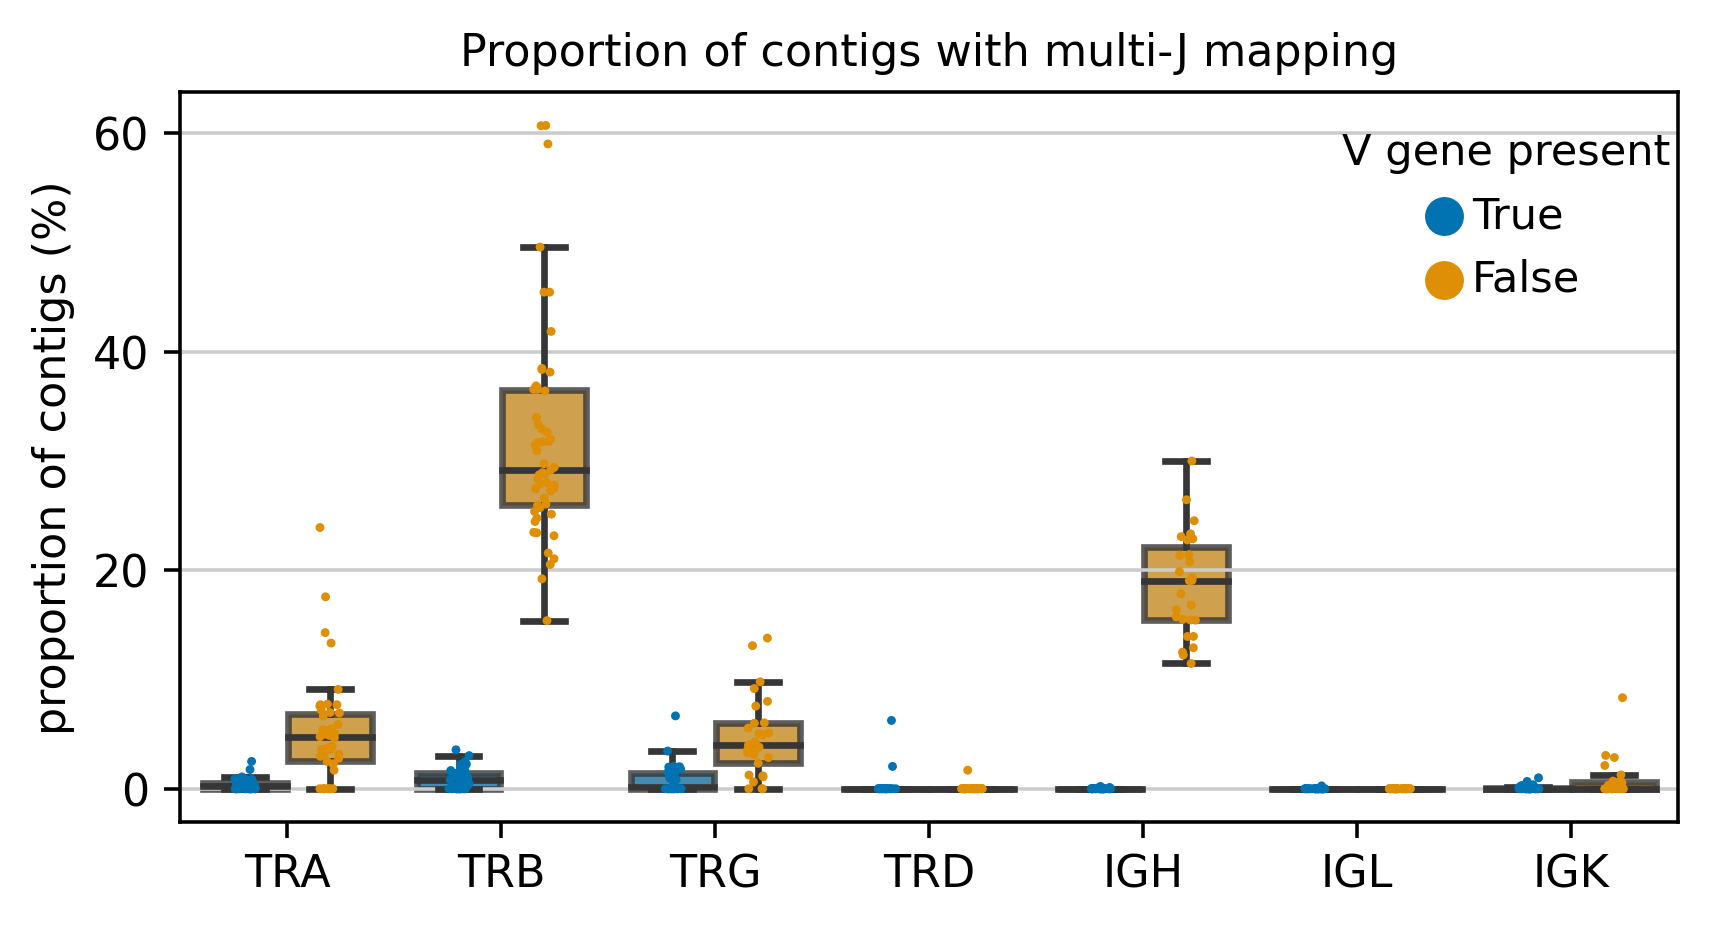

In [35]:
plt.figure(figsize=(6, 3))
order = ['TRA','TRB','TRG','TRD','IGH','IGL','IGK']
ax = sb.boxplot(x="locus", y="j_multi_perc", hue='v_gene_present',order=order,data=df_plot,dodge=True, showfliers = False, boxprops=dict(alpha=.8))
ax = sb.stripplot(x="locus", y="j_multi_perc", hue='v_gene_present',order=order,data=df_plot,
                 size=2, dodge=True)
plt.xticks(fontsize=10,rotation=0)
plt.yticks(fontsize=10)
plt.xlabel('')
plt.ylabel('proportion of contigs (%)',fontsize=10)
#ax.set(ylim=(0, 70))
plt.title('Proportion of contigs with multi-J mapping',fontsize=10)
h,l = ax.get_legend_handles_labels()
plt.rcParams['legend.title_fontsize'] = 'x-small'
l1 = ax.legend(h[2:],l[2:],title='V gene present', loc='upper left',frameon=False, bbox_to_anchor=(0.75, 1),fontsize='x-small')
plt.savefig(fig_path+'j_multimapper_perc.pdf',bbox_inches='tight');

wilcoxon rank sum test for p values

In [36]:
test_res = pd.DataFrame(index = order, columns = ['pval'])
for locus in test_res.index:
    df_select = df_plot[df_plot['locus']==locus]
    a = df_select.loc[df_select['v_gene_present']=='True',"j_multi_perc"]
    b = df_select.loc[df_select['v_gene_present']=='False',"j_multi_perc"]
    
    test_res.loc[locus, 'pval'] = sp.stats.ranksums(a, b)[1]
test_res

,pval
TRA,8.78405e-10
TRB,4.95977e-19
TRG,1.47389e-05
TRD,0.684127
IGH,3.60068e-11
IGL,0.837912
IGK,0.0727018


# Logistic regression to look at what influence J_multimappers

In [37]:
df = vdj_cell[['j_multi_present','sample','celltype','locus','v_gene_present','j_call_leftmost']]

In [38]:
df.loc[df['j_multi_present']=='True','j_multi_present'] = 1
df.loc[df['j_multi_present']=='False','j_multi_present'] = 0
df['j_multi_present'] = df['j_multi_present'].astype('int')

/home/jovyan/my-conda-envs/skeleton/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-38-e863c489146d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['j_multi_present']=='True','j_multi_present'] = 1
<ipython-input-38-e863c489146d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['j_multi_present']=='Fals

In [39]:
df.to_csv('csv/LR.csv')

In [40]:
%%R -i df

fit <- glm(j_multi_present ~ celltype + v_gene_present + j_call_leftmost, data=df, family='binomial')
results = as.data.frame(summary(fit)$coefficients)
results$adj_pval = p.adjust(results$`Pr(>|z|)`, method = 'BH')

results[results$adj_pval<0.05,]

                             Estimate Std. Error     z value      Pr(>|z|)
(Intercept)                -0.8087632 0.11304909   -7.154088  8.423106e-13
celltypeB1                  0.7050738 0.13502002    5.221994  1.770067e-07
celltypeCD4+T              -0.5298619 0.09541288   -5.553359  2.802324e-08
celltypeCYCLING_B           0.5733652 0.16622344    3.449364  5.619082e-04
celltypeCYCLING_NK          0.5734050 0.10466063    5.478707  4.284441e-08
celltypeCYCLING_PDC         1.3476151 0.45715347    2.947840  3.200030e-03
celltypeDN(P)_T             0.2801420 0.08607488    3.254631  1.135398e-03
celltypeDP(P)_T             0.8427404 0.08050078   10.468723  1.202540e-25
celltypeDP(Q)_T             0.3969455 0.08855789    4.482328  7.383327e-06
celltypeHSC_MPP             1.0566002 0.34254928    3.084520  2.038806e-03
celltypeILC2                0.9122470 0.29039502    3.141400  1.681421e-03
celltypeILC3                0.4832134 0.11665336    4.142301  3.438381e-05
celltypeLMPP_MLP         

In [42]:
%%R 
write.csv(results, 'csv/LR_results_110123.csv')
write.csv(results, '/home/jovyan/mount/gdrive/VDJ_collab/manuscript/supplement/LR_results.csv')